In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [5]:
# Refined Dataset
df = pd.read_excel("Refined_Dataset1.xlsx")
df.head()

,Date,Series,ISIN Code,Volume,Company Name,Turnover,%Deliverble,Industry,Prev Close,VWAP,...,High,Deliverable Volume,Last,Fake_Stock,Market_Event,SMA_10,EMA_10,RSI,MACD,Close_Lag_1
0,2000-01-20,HDFCBANK,EQ,179.508590,185.976453,185.975122,175.266854,178.410154,178.229778,179.001262,...,4.817581e+12,112855.756706,0.496374,XYZ,NaN,153571.438867,181609.608887,65.522524,51651.102251,349818.301791
1,2000-01-21,HDFCBANK,EQ,179.362273,175.845239,191.707021,172.898952,191.309921,188.262870,181.742336,...,8.591854e+12,112855.756706,0.496374,ABC,NaN,192290.037966,234467.800751,72.799468,72088.767803,269097.553230
2,2000-01-24,HDFCBANK,EQ,188.082433,200.092373,202.584007,192.222548,200.349259,201.010414,200.836125,...,8.931138e+12,112855.756706,0.496374,XYZ,NaN,227183.225364,273540.188326,66.501222,85447.794776,472329.664136
3,2000-01-25,HDFCBANK,EQ,201.558138,199.830440,216.654822,198.958047,216.688422,215.829992,211.496208,...,6.114077e+12,112855.756706,0.496374,PQR,NaN,241634.044065,276585.982669,56.519692,82250.850995,449365.932414
4,2000-01-27,HDFCBANK,EQ,215.242914,223.756186,233.709359,220.128991,228.343656,230.856902,228.616101,...,1.291594e+13,112855.756706,0.496374,PQR,NaN,289396.960170,328766.959527,69.954973,100609.647021,290292.057213


In [7]:
# Features and Target
features = ["Volume", "Turnover", "VWAP", "Prev Close", "High", 
            "Deliverable Volume", "SMA_10", "EMA_10", "RSI", "MACD", "Close_Lag_1"]
target = "Close"

X = df[features]
y = df[target]

In [8]:
# Train-Test Split (Time-Series Aware)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (72415, 11)
Test shape: (18104, 11)


In [9]:
# Train XGBoost Model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 942219.02


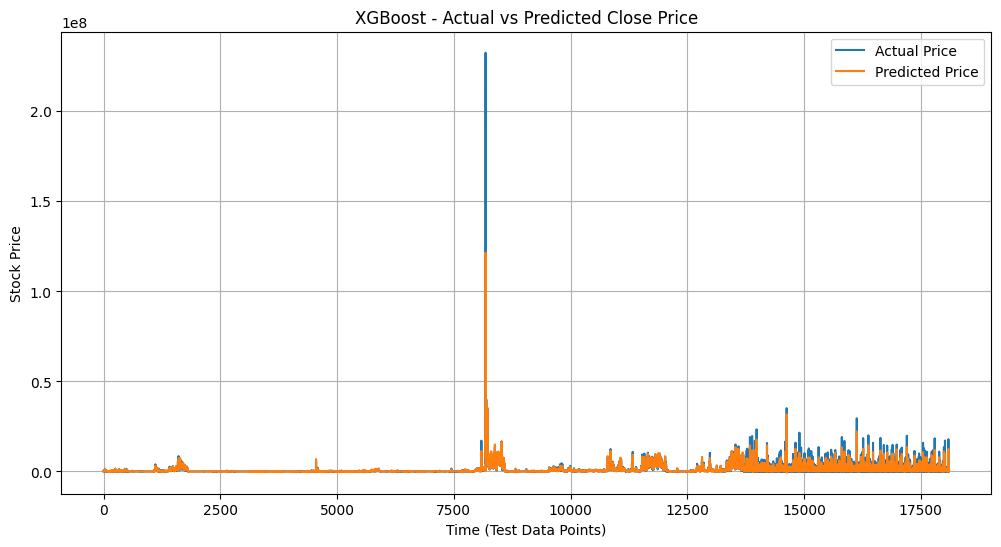

In [10]:
#  Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title("XGBoost - Actual vs Predicted Close Price")
plt.xlabel("Time (Test Data Points)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()